In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [399]:
# THis is the function that adds a row to the summary, for every match and every failed check that appears. 
def flattening_list(list_dictionaries):
    dictionaries=[]
    for element in list_dictionaries:
        if isinstance(element,dict):
            dictionaries.append(element)
        if isinstance(element,dict)==False:
            for dictionary in element:
                dictionaries.append(dictionary)
        if element is None:
            pass
    return(dictionaries)
def add_to_summary_table( no_pago, valor_inicial, pago_capital ,intereses,valor_nuevo,pago_acumulado, pago_intereses_acum, pago_capital_acum): 
    no_pago_list=[]
    valor_inicial_list=[]
    pago_capital_list=[]
    intereses_list=[]
    valor_nuevo_list=[]
    pago_acumulado_list=[]
    pago_intereses_acum_list=[]
    pago_capital_acum_list=[]

    no_pago_list.append(no_pago)
    valor_inicial_list.append(valor_inicial)
    pago_capital_list.append(pago_capital)
    intereses_list.append(intereses)
    valor_nuevo_list.append(valor_nuevo)
    pago_acumulado_list.append(pago_acumulado)
    pago_intereses_acum_list.append(pago_intereses_acum)
    pago_capital_acum_list.append(pago_capital_acum)



    failed_checks_dict= {'periodo':no_pago_list
                         ,'saldo_inicial':valor_inicial_list
                        ,'pago_capital': pago_capital_list
                        ,'intereses':intereses_list
                        ,'saldo_final':valor_nuevo_list
                        , 'pago_acumulado':pago_acumulado_list
                        ,'pago_intereses_acum':pago_intereses_acum_list
                        ,'pago_capital_acum':pago_capital_acum_list}
    return(failed_checks_dict) #dictionary with match failed checks

def dictionaries_joining(dictionaries): #Joins the failed_df dictionaries and converts it to a dataframe.
    for num in range(0,len(dictionaries)-1):
        # print(num)
        for key in dictionaries[0]:
            if key in dictionaries[num+1]:
                for value in dictionaries[num+1][key]:
                    dictionaries[0][key] += [value]
    dict_df=dictionaries[0]#pd.DataFrame(dictionaries[0])
    return(dict_df)  

In [504]:
tasa_equivalente_anual= .1010 #.85 # para lo del TEC
tasa_equivalente_mensual = ((1+tasa_equivalente_anual)**(1/12))-1
tasa_equivalente_mensual

0.008050470307310986

In [636]:
valor_inicial=117586.77#+817.55#-2186.68
tasa=.007
pago_mensual=[500,3004.23]
periodos_pagos=[6,46]
seguros= 0

In [627]:
valor_inicial= 410332
tasa=tasa_equivalente_mensual 
pago_mensual= 4800#+6000#*2#4734*2
pagos_extras = 350
seguros= 0
meses=12*19

In [628]:



valor_nuevo=valor_inicial
pago_acumulado= 0
pago_intereses_acum=0
pago_capital_acum=0
table_dict=[]
periods=[]
for no_pago in range (1,meses): # meses
    periods.append(no_pago)
    pago_acumulado+=pago_mensual
    valor_inicial= round(valor_nuevo,2)
    intereses= round(((valor_inicial)*(tasa)),2)
    pago_intereses_acum+=intereses
    valor_c_intereses =round(valor_inicial + intereses,2)
    pago_capital= round(pago_mensual- intereses,2)
    pago_capital_acum+= pago_capital
    valor_nuevo= round(valor_c_intereses - pago_mensual,2)
    table_dict.append(add_to_summary_table(no_pago, valor_inicial, pago_capital ,intereses,valor_nuevo,pago_acumulado, pago_intereses_acum, pago_capital_acum))
        
    if valor_nuevo<=0:
        print('Pago terminado en periodo ',no_pago/12 )
        break
        
    
valor_nuevo

Pago terminado en periodo  12.166666666666666


-3147.87

In [629]:
amortizacion_df=pd.DataFrame(dictionaries_joining(table_dict))
amortizacion_df.loc[:,'eficiencia']=amortizacion_df['pago_capital']/(amortizacion_df['pago_capital']+amortizacion_df['intereses'])
amortizacion_df

,periodo,saldo_inicial,pago_capital,intereses,saldo_final,pago_acumulado,pago_intereses_acum,pago_capital_acum,eficiencia
0,1,410332.00,1496.63,3303.37,408835.37,4800,3303.37,1496.63,0.311798
1,2,408835.37,1508.68,3291.32,407326.69,9600,6594.69,3005.31,0.314308
2,3,407326.69,1520.83,3279.17,405805.86,14400,9873.86,4526.14,0.316840
3,4,405805.86,1533.07,3266.93,404272.79,19200,13140.79,6059.21,0.319390
4,5,404272.79,1545.41,3254.59,402727.38,24000,16395.38,7604.62,0.321960
...,...,...,...,...,...,...,...,...,...
141,142,20406.91,4635.71,164.29,15771.20,681600,287039.20,394560.80,0.965773
142,143,15771.20,4673.03,126.97,11098.17,686400,287166.17,399233.83,0.973548
143,144,11098.17,4710.65,89.35,6387.52,691200,287255.52,403944.48,0.981385
144,145,6387.52,4748.58,51.42,1638.94,696000,287306.94,408693.06,0.989287


In [630]:
amortizacion_df.loc[amortizacion_df.index[-1],'pago_capital_acum']/(amortizacion_df.loc[amortizacion_df.index[-1],'pago_intereses_acum']+amortizacion_df.loc[amortizacion_df.index[-1],'pago_capital_acum'])


0.5900112300228312

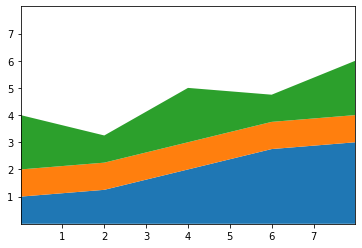

In [631]:
import matplotlib.pyplot as plt
import numpy as np

# plt.style.use('_mpl-gallery')

# make data
x = np.arange(0, 10, 2)
ay = [1, 1.25, 2, 2.75, 3]
by = [1, 1, 1, 1, 1]
cy = [2, 1, 2, 1, 2]
y = np.vstack([ay, by, cy])

# plot
fig, ax = plt.subplots()

ax.stackplot(x, y)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

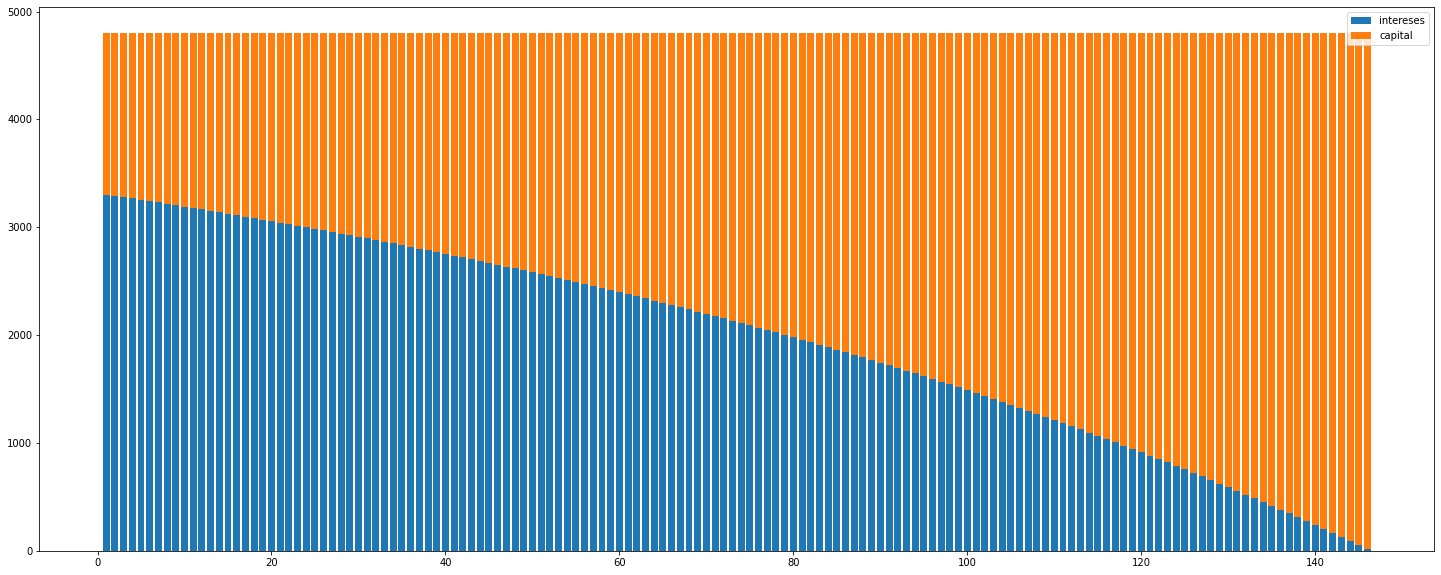

In [632]:
fig, ax = plt.subplots(figsize=(25,10))
ax.bar(periods, amortizacion_df['intereses'], label='intereses')
ax.bar(periods, amortizacion_df['pago_capital'],bottom= amortizacion_df['intereses'],label='capital')
ax.legend()

(0.0, 700000.0)

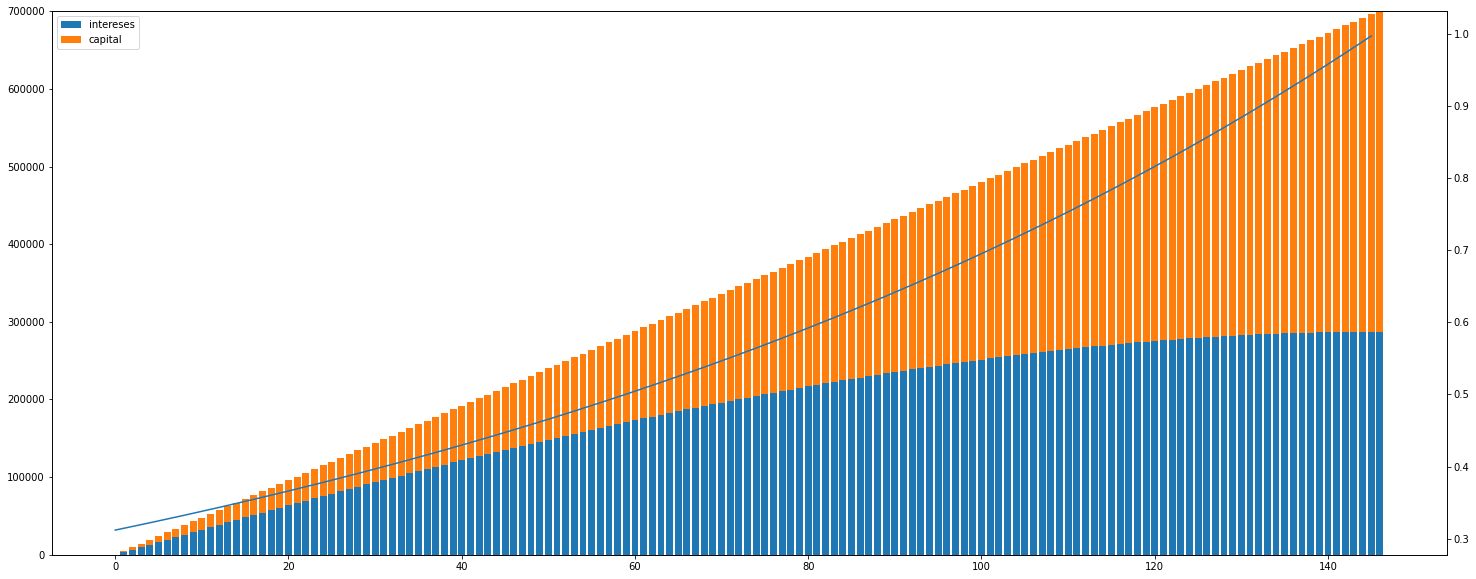

In [633]:
fig, ax = plt.subplots(figsize=(25,10))
ax.bar(periods, amortizacion_df['pago_intereses_acum'], label='intereses')
ax.bar(periods, amortizacion_df['pago_capital_acum'],bottom= amortizacion_df['pago_intereses_acum'],label='capital')
# ax.plot(amortizacion_df['pago_intereses_acum'].diff())
ax2= ax.twinx()
ax2.plot(amortizacion_df['eficiencia'])
ax.legend()
ax.set_ylim(0,700000)

In [596]:
len(periods)

44

In [553]:
len(dictionary_heo.keys())

8

In [634]:
779.10/115803.71

0.006727763730540239

In [635]:
802.35/115400.25

0.0069527579013043735

In [ ]:
.007